# Terzaghi Vertical Stress

In [30]:
import numpy as np
import math

# Vertical Stress due to point load
def σv(point_load=0,radius=0, depth=1):
    '''
    Calculates the vertical stress of due to a point load at a 
    radius r and depth z 
    from the location of the point load
    
    Parameters
    point_load: Force (in kN)
    r         : radius
    z         : depth
    
    Output
    vertical_stress at r,z from due to point load 
    '''
    Q = point_load # kN
    r = radius  # meters
    z = depth   # meters
    vertical_stress = (3*Q/(2 * math.pi * z**2 ))*( 1/(1+(r/z)**2))**(5/2)
    return vertical_stress

class Point():
    def __init__(self,x,y,z=0,Q=0):
        self.x = x
        self.y = y
        self.z = z
        self.Q = Q
        self.sigma = 0
        self.over_burden_pressure = 0
        self.total_pressure = 0 
    def __str__(self):
        return f"x:{self.x} y:{self.y} z:{self.z} Q:{self.Q} sigma:{self.sigma} overburden_p:{self.over_burden_pressure} total_pressure: {self.total_pressure}"
    def add_pressure(self,p):
        self.sigma += p
        
def get_point_list():
    '''
    Generates multiple point load
    '''
    
    # Top view extends of the break water
    width = 37 # along y axis
    length = 200 # along x axis

    # p1, p2, p3 are the 3 points of the tetraheral breakwater which are in contact with the surface of the seafloor
    p1 = Point(1.5,0)
    p2 = Point(2.8,2.25)
    p3 = Point(0.201,2.25)

    # Generates several point load assuming multiple tetraheral breakwater
    x_offset = 2.598
    y_offset = 2.25

    point_list = []

    for y in np.arange(0,width, y_offset):
        for x in np.arange(0,length,x_offset):
            point_list.append(Point(p1.x + x, p1.y + y))
            point_list.append(Point(p2.x + x, p2.y + y))
            point_list.append(Point(p3.x + x, p3.y + y))
    total_weight = 307*24*length # kN
    point_load_Q  = (total_weight)/len(point_list)
    
    for p in point_list:
        p.Q = point_load_Q
    
    return point_list

def get_pz_list(xmin=-20,xmax=120,ymin=-20,ymax=57, interval=1):
    xs = np.arange(xmin,xmax,interval)
    ys = np.arange(ymin,ymax,interval)
    pz_list=[]
    for x in xs:
        for y in ys:
            pz_list.append(Point(x,y))
    return pz_list

def σv_mod(p_list,pn_list,depth):
    '''
    Calculates the vertical stress of a list of points pn_list
    taking into account the vertical stress effects due to a list of point load p_list
    
    Paramaters
    p_list : list of point load [Point(x,y,z,Q)]
    pn_list: list of point with coordiates x y where vertical stress is to be calculated 
    depth  : depth of at which the vertical stress is to be evaluated
    
    Output:
    
    pd_list : updated Point with calculated σv and over burden pressure 
    
    '''
    
    z= depth
    for p in pn_list:
        p.sigma=0
    
        for point in p_list:
            r = math.sqrt((p.y-point.y)**2 + (p.x-point.x)**2)
            p.z = z
            p.sigma += σv(point_load=point.Q,radius=r, depth=z)
            
        p.over_burden_pressure = (27 * z) #27kN/m3
        p.total_pressure = p.sigma + p.over_burden_pressure

    return pn_list

def σv_mod2(p_list,px,py,depth):
    '''
    Calculates the vertical stress of point of interest
    taking into account the vertical stress effects due to a list of point load p_list
    
    Paramaters
    p_list : list of point load [Point(x,y,z,Q)]
    px     : x coordinate of point p
    py     : y coordinate of point p
    depth  : z coordiated of point p with
    '''
    
    z= depth

    sigma=0
    
    for point in p_list:
        pty = float(point.y)
        ptx = float(point.x)
        r = np.sqrt((py-pty)**2 + (px-ptx)**2)
        z = z
        sigma += σv(point_load=point.Q,radius=r, depth=z)            
    over_burden_pressure = (27 * z) #27kN/m3
    hydrostatic_pressure = 9.8 * 11 # 9.8 kn/m3
    total_pressure = sigma + over_burden_pressure + hydrostatic_pressure

    return total_pressure
        


## Declare a point load at (x=0m,y=0m,z=0m) with a downward force of 24 kN

The assumption here is the the point loads are distributed along the x, y plane at z = 0

* x,y,z are all in meters
* Q is positive and pointing downwards 



In [31]:
point_list = [Point(0,0,0,Q=24)]

## Pick a point of interest where the vertical stress is to be calculated

For this example at x = 1.5 m and y = 0m

In [32]:
pz_list = [Point(1.5,0)]

## Calculate the vertical stresses of the points of interest point pz_list

In [33]:
answer = σv_mod(point_list,pz_list,1)

In [34]:
answer[0].__dict__

{'x': 1.5,
 'y': 0,
 'z': 1,
 'Q': 0,
 'sigma': 0.6017889730420682,
 'over_burden_pressure': 27,
 'total_pressure': 27.60178897304207}

## Generate Multiple Point loads example

In [40]:
point_list = get_point_list()

In [41]:
# pz_list = get_pz_list(xmin=0,xmax=100,ymin=0,ymax=40, interval=1)
# answer = σv_mod(point_list,pz_list,1)

In [42]:
point_list[0].Q

375.2482811306341

In [43]:
print(len(point_list))

3927


In [294]:
x=[]
y=[]
z=[]

for i in answer:
    x.append(i.x)
    y.append(i.y)
    z.append(i.total_pressure)

# Generate a stress distribution in section view

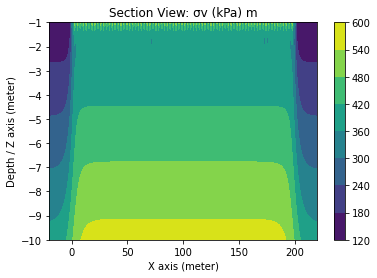

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm


N = 200
x = np.linspace(-20,220, 400)
z = np.linspace(1,10, N)
X, Z = np.meshgrid(x, z)


# setting y = 18
P = σv_mod2(point_list,X,18,Z)


fig, ax = plt.subplots()
CS = ax.contourf(X, -Z, P)
cbar=fig.colorbar(CS)
ax.set_title(f'Section View: σv (kPa)')
plt.ylabel('Depth / Z axis (meter)')
plt.xlabel('X axis (meter)')
#plt.savefig(f'plot.png')
plt.show()


# Generate a stress distribution in Plan View (at dpeth

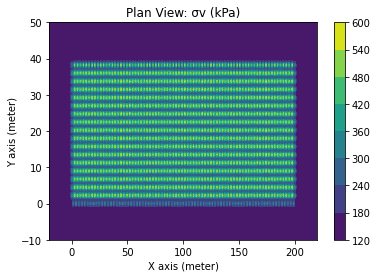

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm



N = 200
x = np.linspace(-20,220, 400)
y = np.linspace(-10,50, 400)
X, Y = np.meshgrid(x, y)

# at depth = 1m
P = σv_mod2(point_list,X,Y,1)


fig, ax = plt.subplots()
CS = ax.contourf(X, Y, P)
cbar=fig.colorbar(CS)
ax.set_title(f'Plan View: σv (kPa)')
plt.ylabel('Y axis (meter)')
plt.xlabel('X axis (meter)')
#plt.savefig(f'plot.png')
plt.show()
